In [2]:
import sklearn
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score
data  = load_breast_cancer()

x_names = data["target_names"]
x = data['target']
y_names = data["feature_names"]
y = data["data"]

#x label data
print(x_names)
print()
print(x)

['malignant' 'benign']

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 

In [3]:
# y label data
print(y_names)
print()
print(y)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]


In [4]:
# Train AND Test the the Machine by Data
from sklearn.model_selection import train_test_split
train, test, train_labels, test_labels = train_test_split(y, x, test_size = 0.33, random_state = 42)
print("Train set :",train.shape,train_labels.shape)
print("Train set :",test.shape,test_labels.shape)

Train set : (381, 30) (381,)
Train set : (188, 30) (188,)


In [5]:
# Making Desion TREE for better u understanding
from sklearn.tree import DecisionTreeClassifier
ctf = DecisionTreeClassifier(criterion = "entropy")
ctf.fit(train, train_labels)
data_predict = ctf.predict(test)



In [6]:
# predicting Accuracy of the data
accuracy = accuracy_score(test_labels, data_predict)
print(f"Accuracy : {accuracy * 100:.2f}%")


Accuracy : 95.21%


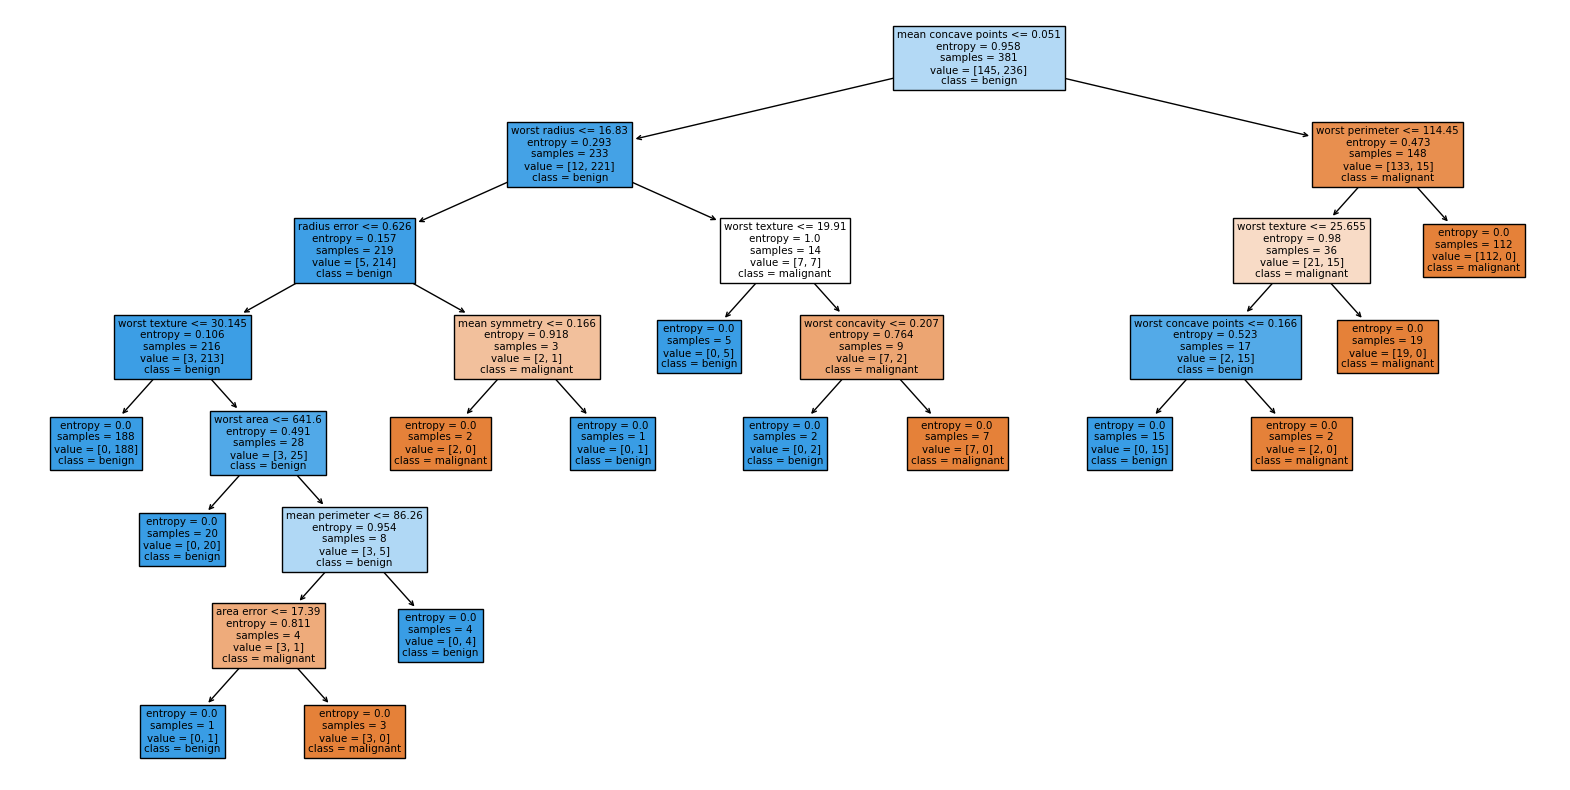

In [89]:
# Making decsion Tree
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize= (20, 10))
tree.plot_tree(ctf,feature_names = y_names,class_names = x_names,filled=True)
plt.show()

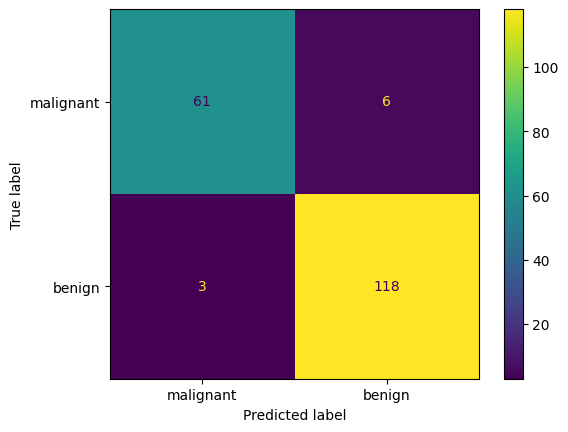

In [7]:
# Making confusion metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(test_labels, data_predict, labels=ctf.classes_)
dispy = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=x_names)
dispy.plot()

In [8]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(train,train_labels)
predict_val = model.predict(test)
print(predict_val)

[ 0.64605676  0.21145476  0.25442271  1.12250875  1.13799181 -0.71289896
 -0.08600067  0.38797159  0.2571979   0.9436093   0.78094607  0.32290431
  0.90466324  0.39424325  0.90712802  0.14167817  0.89241209  1.23865572
  1.4585842   0.05846474  0.68980688  0.87025246 -0.45015063  1.11390294
  0.98381026  0.72206103  0.93703647  0.90830701  0.96425147 -0.19322926
  1.02146792  1.02823043  0.82719109  0.96825391  1.09310585  0.83721198
  0.50498418  0.63059167  0.29121287  0.78752676  1.18561267  0.06153412
  0.95500015  1.00565624  0.48142084  0.67120152  0.92335011  1.11117489
  0.77347442  1.02411546  0.24709081 -0.14189147  0.54739876  0.60075661
  0.98315142  0.8080443   0.95638969 -0.35474261  0.60287355  1.05300072
  0.93858079 -0.20870557 -0.37443091  0.80621466  0.91065343  0.58582146
 -0.16646938 -0.14982645  0.98083829  0.79895553  0.05895986  0.05183184
  0.85845832  0.18789535  1.03356091  0.8547968   0.82794644  0.58151376
  1.17280678  0.71971914  0.40734518  1.05987279  0

In [11]:
#input 30 feature dta the it work
model.predict([[2,4,1,5,3,5]])

In [12]:
from sklearn.linear_model import LogisticRegression
model = LinearRegression()
model.fit(train,train_labels)
predict_val1 = model.predict(test)

print(predict_val1)

[ 0.64605676  0.21145476  0.25442271  1.12250875  1.13799181 -0.71289896
 -0.08600067  0.38797159  0.2571979   0.9436093   0.78094607  0.32290431
  0.90466324  0.39424325  0.90712802  0.14167817  0.89241209  1.23865572
  1.4585842   0.05846474  0.68980688  0.87025246 -0.45015063  1.11390294
  0.98381026  0.72206103  0.93703647  0.90830701  0.96425147 -0.19322926
  1.02146792  1.02823043  0.82719109  0.96825391  1.09310585  0.83721198
  0.50498418  0.63059167  0.29121287  0.78752676  1.18561267  0.06153412
  0.95500015  1.00565624  0.48142084  0.67120152  0.92335011  1.11117489
  0.77347442  1.02411546  0.24709081 -0.14189147  0.54739876  0.60075661
  0.98315142  0.8080443   0.95638969 -0.35474261  0.60287355  1.05300072
  0.93858079 -0.20870557 -0.37443091  0.80621466  0.91065343  0.58582146
 -0.16646938 -0.14982645  0.98083829  0.79895553  0.05895986  0.05183184
  0.85845832  0.18789535  1.03356091  0.8547968   0.82794644  0.58151376
  1.17280678  0.71971914  0.40734518  1.05987279  0